# Prepare rules for the all the data sets 
1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
2) Change the minimum length in apriori algorithm
3) Visulize the obtained rules using different plots 

In [472]:
!pip install mlxtend

In [490]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt 
import seaborn as sns 

In [474]:
Book= pd.read_csv("book.csv")
Book

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [475]:
Book.shape

(2000, 11)

In [476]:
Book.columns

Index(['ChildBks', 'YouthBks', 'CookBks', 'DoItYBks', 'RefBks', 'ArtBks',
       'GeogBks', 'ItalCook', 'ItalAtlas', 'ItalArt', 'Florence'],
      dtype='object')

# Apriori Algorithm for min support= 0.1  

In [477]:
frequent_itemsets = apriori(Book, min_support=0.1, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets 

,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
5,0.2410,(ArtBks),1
6,0.2760,(GeogBks),1
7,0.1135,(ItalCook),1
8,0.1085,(Florence),1
9,0.1650,"(YouthBks, ChildBks)",2


# Rules for min support = 0.1, level of confidence above 70 percent threshold (min_threshold=0.7)

In [478]:
rules1 = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
rules1['length'] = rules1['antecedents'].apply(lambda x: len(x)) + rules1['consequents'].apply(lambda x: len(x))
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,length
0,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548,2
1,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074,2
2,(RefBks),(CookBks),0.2145,0.431,0.1525,0.710956,1.649549,0.060050,1.968556,2
3,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf,2
4,"(YouthBks, ChildBks)",(CookBks),0.1650,0.431,0.1290,0.781818,1.813963,0.057885,2.607917,3
5,"(YouthBks, CookBks)",(ChildBks),0.1620,0.423,0.1290,0.796296,1.882497,0.060474,2.832545,3
6,"(ChildBks, DoItYBks)",(CookBks),0.1840,0.431,0.1460,0.793478,1.841017,0.066696,2.755158,3
7,"(CookBks, DoItYBks)",(ChildBks),0.1875,0.423,0.1460,0.778667,1.840820,0.066687,2.606928,3
8,"(ChildBks, RefBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534,3
9,"(CookBks, RefBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083,3


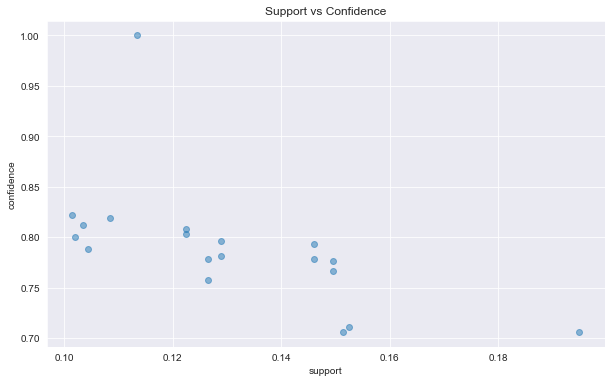

In [479]:
plt.scatter(rules1['support'], rules1['confidence'], alpha = 0.5) 
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence') 
plt.show() 

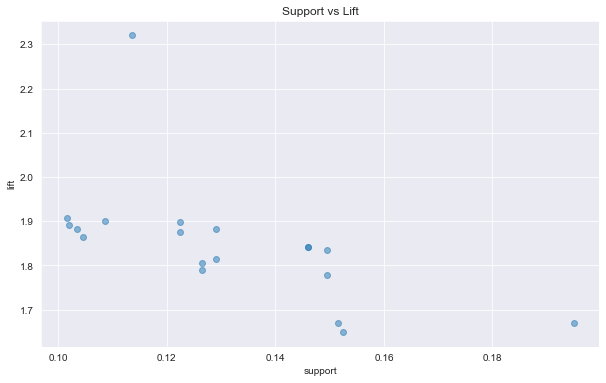

In [480]:
plt.scatter(rules1['support'], rules1['lift'], alpha = 0.5)
plt.xlabel('support')
plt.ylabel('lift') 
plt.title('Support vs Lift') 
plt.show()


# Rules for min support = 0.1, level of confidence above 70 percent threshold (min_threshold=0.7) and length=2

In [482]:
rules2=rules1[ (rules1['length'] == 2)]
rules2 

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,length
0,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548,2
1,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074,2
2,(RefBks),(CookBks),0.2145,0.431,0.1525,0.710956,1.649549,0.060050,1.968556,2
3,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf,2


# For length = 2, no of rules=4

# Rules for min support = 0.1, level of confidence above 70 percent threshold (min_threshold=0.7) and length=3

In [483]:
rules3=rules1[ (rules1['length'] == 3)]
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,length
4,"(YouthBks, ChildBks)",(CookBks),0.1650,0.431,0.1290,0.781818,1.813963,0.057885,2.607917,3
5,"(YouthBks, CookBks)",(ChildBks),0.1620,0.423,0.1290,0.796296,1.882497,0.060474,2.832545,3
6,"(ChildBks, DoItYBks)",(CookBks),0.1840,0.431,0.1460,0.793478,1.841017,0.066696,2.755158,3
7,"(CookBks, DoItYBks)",(ChildBks),0.1875,0.423,0.1460,0.778667,1.840820,0.066687,2.606928,3
8,"(ChildBks, RefBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534,3
9,"(CookBks, RefBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083,3
10,"(ChildBks, ArtBks)",(CookBks),0.1625,0.431,0.1265,0.778462,1.806175,0.056462,2.568403,3
11,"(CookBks, ArtBks)",(ChildBks),0.1670,0.423,0.1265,0.757485,1.790745,0.055859,2.379235,3
12,"(ChildBks, GeogBks)",(CookBks),0.1950,0.431,0.1495,0.766667,1.778809,0.065455,2.438571,3
13,"(CookBks, GeogBks)",(ChildBks),0.1925,0.423,0.1495,0.776623,1.835989,0.068072,2.583081,3


In [484]:
rules3.shape

(15, 10)

# For length =3, no of rules = 15

# Apriori Algorithm for min support= 0.2 

In [485]:
frequent_itemsets1 = apriori(Book, min_support=0.2, use_colnames=True)
frequent_itemsets1['length'] = frequent_itemsets1['itemsets'].apply(lambda x: len(x))
frequent_itemsets1  

,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
5,0.2410,(ArtBks),1
6,0.2760,(GeogBks),1
7,0.2560,"(ChildBks, CookBks)",2


# # Rules for min support = 0.2, level of confidence above 40 percent threshold (min_threshold=0.4)

In [486]:
rules4 = association_rules(frequent_itemsets1, metric="confidence", min_threshold=0.4)
rules4['length'] = rules4['antecedents'].apply(lambda x: len(x)) + rules4['consequents'].apply(lambda x: len(x))
rules4 

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,length
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240,2
1,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069,2


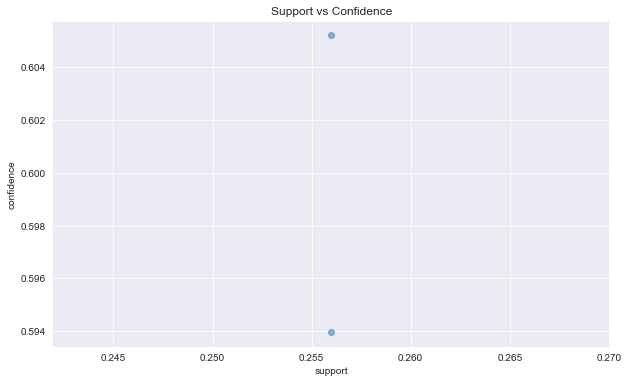

In [487]:
plt.scatter(rules4['support'], rules4['confidence'], alpha = 0.5) 
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence') 
plt.show()

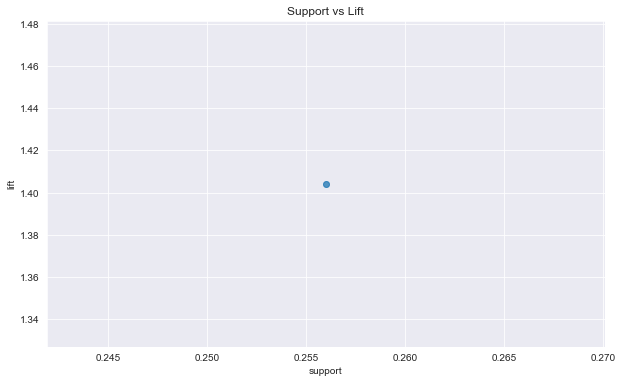

In [488]:
plt.scatter(rules4['support'], rules4['lift'], alpha = 0.5)
plt.xlabel('support')
plt.ylabel('lift') 
plt.title('Support vs Lift') 
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


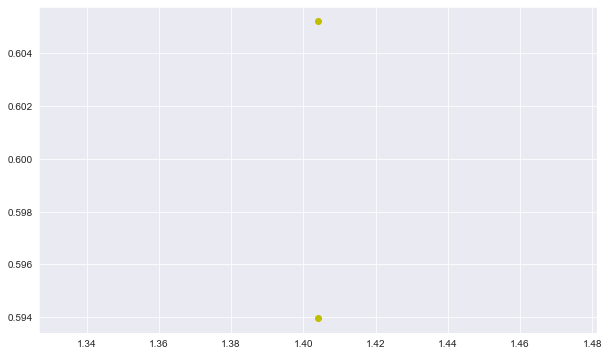

In [489]:
fit = np.polyfit(rules4['lift'], rules4['confidence'], 1)
fit_fn = np.poly1d(fit) 
plt.plot(rules4['lift'], rules4['confidence'], 'yo', rules4['lift'], fit_fn(rules4['lift']))

# Rules for min support = 0.2, level of confidence above 40 percent threshold (min_threshold=0.4) and length=2
 

In [433]:
rules5=rules4[ (rules4['length'] == 2)]
rules5

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,length
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240,2
1,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069,2


# for min support value 0f 0.2 and thrshold confidence value of 0.4 there are only 2 rules with length= 2